### Importaci√≥n de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

In [ ]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categor√≠a del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de env√≠o          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificaci√≥n            2359 non-null   int64  
 8   M√©todo de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


#1. An√°lisis de facturaci√≥n



##1.1 Ingresos totales por tienda

In [ ]:
ingresos = {
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingreso Total": [
        tienda["Precio"].sum(),
        tienda2["Precio"].sum(),
        tienda3["Precio"].sum(),
        tienda4["Precio"].sum()
    ]
}

df_ingresos = pd.DataFrame(ingresos)

df_ingresos["Ingreso Formateado"] = df_ingresos["Ingreso Total"].apply(lambda x: f"${x:,.0f}")

df_ingresos

Tienda  Ingreso Total Ingreso Formateado
0  Tienda 1   1.150880e+09     $1,150,880,400
1  Tienda 2   1.116344e+09     $1,116,343,500
2  Tienda 3   1.098020e+09     $1,098,019,600
3  Tienda 4   1.038376e+09     $1,038,375,700

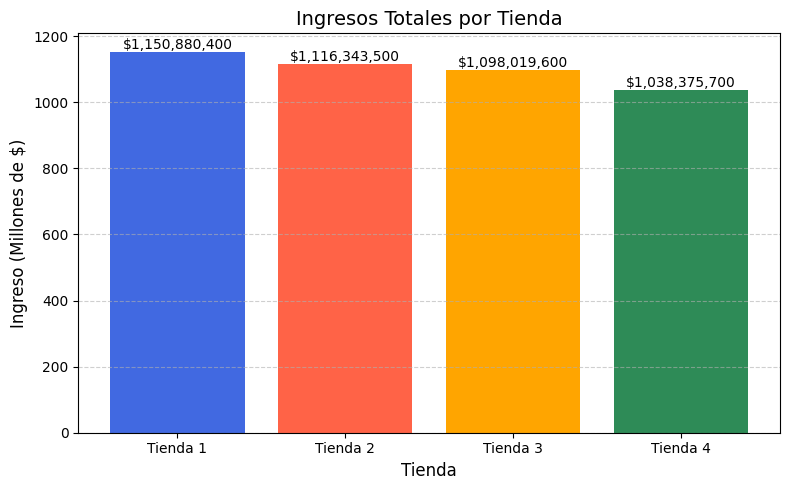

In [ ]:
import matplotlib.pyplot as plt

colores = ["royalblue", "tomato", "orange", "seagreen"]

# Escalar a millones
df_ingresos["Ingreso en Millones"] = df_ingresos["Ingreso Total"] / 1_000_000


plt.figure(figsize=(8, 5))
bars = plt.bar(df_ingresos["Tienda"], df_ingresos["Ingreso en Millones"], color=colores)


for bar, label in zip(bars, df_ingresos["Ingreso Formateado"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), label,
             ha='center', va='bottom', fontsize=10)


plt.title("Ingresos Totales por Tienda", fontsize=14)
plt.ylabel("Ingreso (Millones de $)", fontsize=12)
plt.xlabel("Tienda", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# 2. Ventas por categor√≠a

In [ ]:
df_prodxcat_t1 = tienda.groupby('Categor√≠a del Producto')[["Producto"]].count().sort_values(by="Producto", ascending=False)
df_prodxcat_t2 = tienda2.groupby('Categor√≠a del Producto')[["Producto"]].count().sort_values(by="Producto", ascending=False)
df_prodxcat_t3 = tienda3.groupby('Categor√≠a del Producto')[["Producto"]].count().sort_values(by="Producto", ascending=False)
df_prodxcat_t4 = tienda4.groupby('Categor√≠a del Producto')[["Producto"]].count().sort_values(by="Producto", ascending=False)

print(df_prodxcat_t1)
print(df_prodxcat_t2)
print(df_prodxcat_t3)
print(df_prodxcat_t4)

                         Producto
Categor√≠a del Producto           
Muebles                       465
Electr√≥nicos                  448
Juguetes                      324
Electrodom√©sticos             312
Deportes y diversi√≥n          284
Instrumentos musicales        182
Libros                        173
Art√≠culos para el hogar       171
                         Producto
Categor√≠a del Producto           
Muebles                       442
Electr√≥nicos                  422
Juguetes                      313
Electrodom√©sticos             305
Deportes y diversi√≥n          275
Instrumentos musicales        224
Libros                        197
Art√≠culos para el hogar       181
                         Producto
Categor√≠a del Producto           
Muebles                       499
Electr√≥nicos                  451
Juguetes                      315
Electrodom√©sticos             278
Deportes y diversi√≥n          277
Libros                        185
Art√≠culos para el hogar       177

# 3. Calificaci√≥n promedio de la tienda


In [ ]:
promedios = {
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Promedio": [
        tienda['Calificaci√≥n'].mean(),
        tienda2['Calificaci√≥n'].mean(),
        tienda3['Calificaci√≥n'].mean(),
        tienda4['Calificaci√≥n'].mean()
    ]
}

df_promedios = pd.DataFrame(promedios)

df_promedios

Tienda  Promedio
0  Tienda 1  3.976685
1  Tienda 2  4.037304
2  Tienda 3  4.048326
3  Tienda 4  3.995759

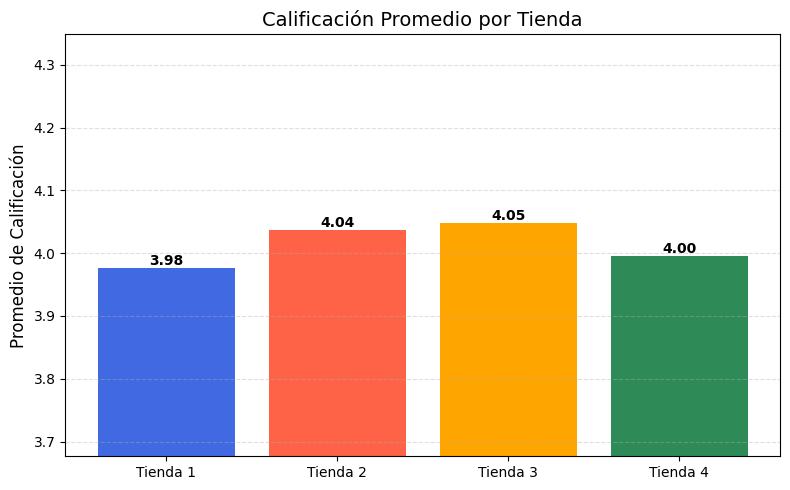

In [ ]:

plt.figure(figsize=(8, 5))
bars = plt.bar(df_promedios["Tienda"], df_promedios["Promedio"], color=colores)


for bar, promedio in zip(bars, df_promedios["Promedio"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{promedio:.2f}",
             ha='center', va='bottom', fontsize=10, weight='bold')


plt.title("Calificaci√≥n Promedio por Tienda", fontsize=14)
plt.ylabel("Promedio de Calificaci√≥n", fontsize=12)

# Amplificar escalas
minimo = df_promedios["Promedio"].min()
maximo = df_promedios["Promedio"].max()
margen = 0.3
plt.ylim(minimo - margen, maximo + margen)

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# 4. Productos m√°s y menos vendidos

##4.1 Prodctos mas vendidos por tienda

In [ ]:

df_prodcant1 = tienda["Producto"].value_counts().sort_values(ascending=False)
df_prodcant2 = tienda2["Producto"].value_counts().sort_values(ascending=False)
df_prodcant3 = tienda3["Producto"].value_counts().sort_values(ascending=False)
df_prodcant4 = tienda4["Producto"].value_counts().sort_values(ascending=False)

producto_mas_vendido = df_prodcant1.idxmax()
cantidad_mas_vendida = df_prodcant1.max()

producto_mas_vendido2 = df_prodcant2.idxmax()
cantidad_mas_vendida2 = df_prodcant2.max()

producto_mas_vendido3 = df_prodcant3.idxmax()
cantidad_mas_vendida3 = df_prodcant3.max()

producto_mas_vendido4 = df_prodcant4.idxmax()
cantidad_mas_vendida4 = df_prodcant4.max()

print(f"Producto m√°s vendido de la tienda 1: {producto_mas_vendido} ({cantidad_mas_vendida} ventas)")
print(f"Producto m√°s vendido de la tienda 2: {producto_mas_vendido2} ({cantidad_mas_vendida2} ventas)")
print(f"Producto m√°s vendido de la tienda 3: {producto_mas_vendido3} ({cantidad_mas_vendida3} ventas)")
print(f"Producto m√°s vendido de la tienda 4: {producto_mas_vendido4} ({cantidad_mas_vendida4} ventas)")



Producto m√°s vendido de la tienda 1: Microondas (60 ventas)
Producto m√°s vendido de la tienda 2: Iniciando en programaci√≥n (65 ventas)
Producto m√°s vendido de la tienda 3: Kit de bancas (57 ventas)
Producto m√°s vendido de la tienda 4: Cama box (62 ventas)


##4.2 Productos menos vendidos por tienda

In [ ]:
producto_maenos_vendido = df_prodcant1.idxmin()
cantidad_maenos_vendida = df_prodcant1.min()

producto_maenos_vendido2 = df_prodcant2.idxmin()
cantidad_maenos_vendida2 = df_prodcant2.min()

producto_maenos_vendido3 = df_prodcant3.idxmin()
cantidad_maenos_vendida3 = df_prodcant3.min()

producto_maenos_vendido4 = df_prodcant4.idxmin()
cantidad_maenos_vendida4 = df_prodcant4.min()

print(f"Producto menos vendido de la tienda 1: {producto_maenos_vendido} ({cantidad_maenos_vendida} ventas)")
print(f"Producto menos vendido de la tienda 2: {producto_maenos_vendido2} ({cantidad_maenos_vendida2} ventas)")
print(f"Producto menos vendido de la tienda 3: {producto_maenos_vendido3} ({cantidad_maenos_vendida3} ventas)")
print(f"Producto menos vendido de la tienda 4: {producto_maenos_vendido4} ({cantidad_maenos_vendida4} ventas)")

Producto menos vendido de la tienda 1: Auriculares con micr√≥fono (33 ventas)
Producto menos vendido de la tienda 2: Juego de mesa (32 ventas)
Producto menos vendido de la tienda 3: Bloques de construcci√≥n (35 ventas)
Producto menos vendido de la tienda 4: Guitarra el√©ctrica (33 ventas)


# 5. Costo de env√≠o promedio por tienda

In [ ]:
promedios_costos = {
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Costo Promedio": [
        tienda['Costo de env√≠o'].mean(),
        tienda2['Costo de env√≠o'].mean(),
        tienda3['Costo de env√≠o'].mean(),
        tienda4['Costo de env√≠o'].mean()
    ]
}

df_costo = pd.DataFrame(promedios_costos)

df_pcosto = df_costo.sort_values(by="Costo Promedio", ascending=False)

df_pcosto

Tienda  Costo Promedio
0  Tienda 1    26018.609580
1  Tienda 2    25216.235693
2  Tienda 3    24805.680373
3  Tienda 4    23459.457167

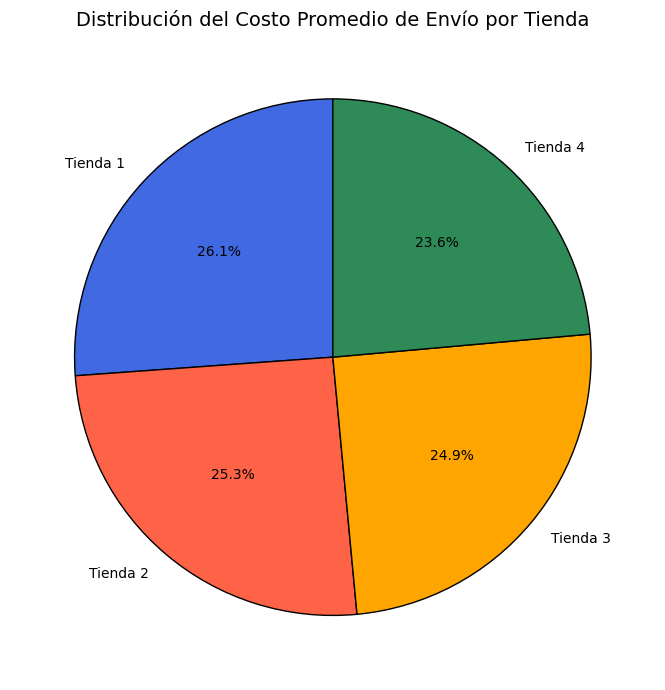

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(df_pcosto["Costo Promedio"],
        labels=df_pcosto["Tienda"],
        autopct="%1.1f%%",
        startangle=90,
        colors=colores,
        wedgeprops={'edgecolor': 'black'})

plt.title("Distribuci√≥n del Costo Promedio de Env√≠o por Tienda", fontsize=14)
plt.tight_layout()
plt.show()


# 6. Informe del analisis

*Recomendaci√≥n para adminitrar las tiendas para el Sr. Juan*

---

## üìå Introducci√≥n

El prop√≥sito de este an√°lisis es identificar cu√°l de las cuatro tiendas disponibles representa la mejor oportunidad de ventas para el Sr. Juan. Para ello, se han analizado y visualizado varios aspectos fundamentales del rendimiento de cada tienda, incluyendo:

- Ingresos totales.
- Categor√≠as de productos m√°s y menos vendidas.
- Productos individuales con mejor y peor desempe√±o.
- Calificaci√≥n promedio otorgada por los clientes.
- Costo promedio de env√≠o.

Con base en estos factores, se presentar√° una recomendaci√≥n clara y justificada.

---

## üìà Desarrollo del an√°lisis

### ü™ô Ingresos totales por tienda

Los ingresos fueron calculados como la suma total de los precios de los productos vendidos. A continuaci√≥n, el resumen:


| Tienda   | Ingreso Total    |
|----------|------------------------|
| Tienda 1 | \$1,150,880,400        |
| Tienda 2 | \$1,116,343,500        |
| Tienda 3 | \$1,098,019,600        |
| Tienda 4 | \$1,038,375,700        |


**Tienda 1** lidera en ingresos, lo cual indica un volumen y valor de ventas superior.

### üì¶ Categor√≠as m√°s y menos vendidas

Cada tienda mostr√≥ un patr√≥n distinto de consumo. Sin embargo, **Electr√≥nicos** y **Muebles** destacan como categor√≠as m√°s vendidas. Por el contrario, categor√≠as como **Libros** figura como la segunda categoria menos demandada en todas las tiendas, en las tiendas 1 y 2 comparten la categoria **Articulos para el hogar** como la menos demandada, y en el caso de las tiendas 3 y 4 ese lugar le corresponde a **Instrumentos musicales**.

Esto puede indicar una preferencia del p√∫blico por productos tecnol√≥gicos y de entretenimiento familiar.

### üßç‚Äç‚ôÇÔ∏è Productos m√°s y menos vendidos

Al revisar productos espec√≠ficos, se observ√≥ que:

El congruencia con lo visto en el analisis de las categorias, los **Microondas** y **Kit de bancas** figuran en los productos mas vendidos, y **Auriculares con microfono** y **Guitarra electrica** como los menos vendidos.

### ‚≠ê Calificaciones promedio

| Tienda   | Calificaci√≥n Promedio |
|----------|:------------------------:|
| Tienda 1 | 3.97                    |
| Tienda 2 | 4.03                    |
| Tienda 3 | 4.04                    |
| Tienda 4 | 3.99                   |

**Tienda 3** sobresale, lo que sugiere **mayor satisfacci√≥n del cliente**, posiblemente debido a buen servicio postventa, producto o entrega. Sin embargo la desviacion es de menos de un 1 puinto por lo tanto no es significativo.

### üöö Costo promedio de env√≠o

| Tienda   | Costo Promedio de Env√≠o  |
|----------|:------------------------------:|
| Tienda 1 | \$26,018.61                   |
| Tienda 2 | \$25,216.24                   |
| Tienda 3 | \$24,805.68                   |
| Tienda 4 | \$23,459.46                   |

La **Tienda 1** tiene el mayor costo de env√≠o promedio, esto puede deberse a que es una tienda que esta localizada a mas distancia de su demanda que las demas, esto se va en la misma linea que los resultados de la calificaciones, recibiendo la menos calificacion tal vez por las demoras en los envios.
---

## ‚úÖ Conclusi√≥n y recomendaci√≥n

Luego de analizar todos los factores relevantes, **la recomendaci√≥n final es que el Sr. Juan deber√≠a vender sus productos en la *Tienda 3*.**

**Justificaci√≥n:**

- Si bien no es quien destaca en todas las estadisticas individualmente, es la tienda con el potecical m√°s balanceado y representa mejor los numeros de los mejores resultado segun los porductos vendidos, **Muebles** y **Electronicos**.
- Posee la **calificaci√≥n promedio m√°s alta**, se√±al de clientes satisfechos.
- Sus costos son el **2do m√°s bajo** persiviendo sus productos como relativamente mas **baratos** que los de las otras tiendas.


#7. Bonus: An√°lisis del desempe√±o geogr√°fico


##7.1 Mapa de Calor por densidad de ventas seg√∫n localizacion

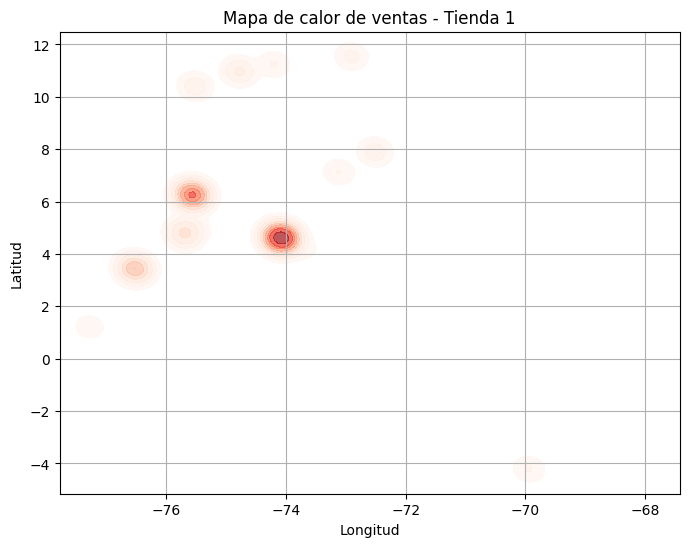

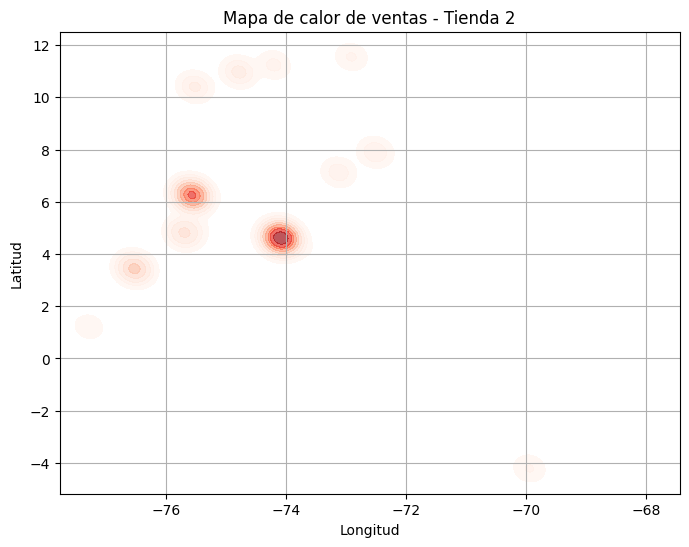

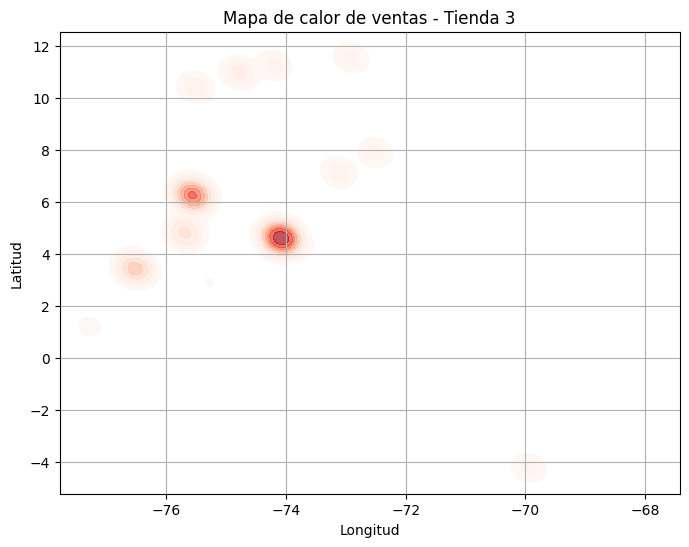

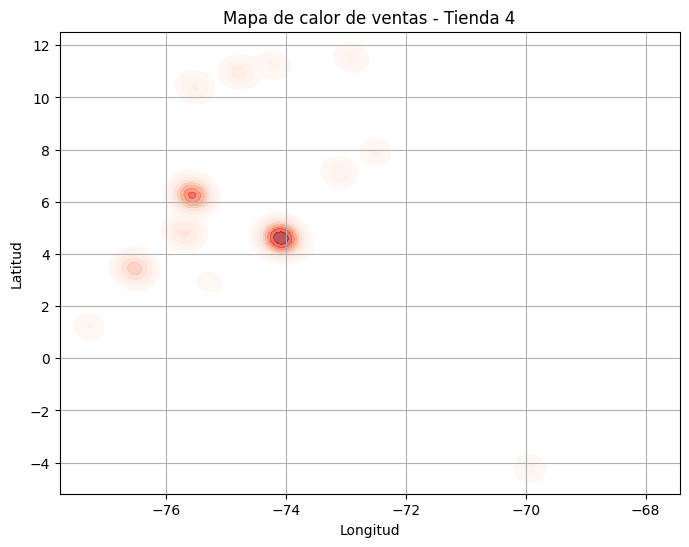

In [3]:
import seaborn as sns

for i, df in enumerate([tienda, tienda2, tienda3, tienda4], start=1):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(
        x=df["lon"], y=df["lat"],
        cmap="Reds", fill=True, bw_adjust=0.5, alpha=0.7, thresh=0.05
    )
    plt.title(f"Mapa de calor de ventas - Tienda {i}")
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")
    plt.grid(True)
    plt.show()


In [4]:
import folium
from folium.plugins import HeatMap

# Crear mapa centrado en el promedio de todas las coordenadas
lat_centro = pd.concat([tienda["lat"], tienda2["lat"], tienda3["lat"], tienda4["lat"]]).mean()
lon_centro = pd.concat([tienda["lon"], tienda2["lon"], tienda3["lon"], tienda4["lon"]]).mean()

mapa = folium.Map(location=[lat_centro, lon_centro], zoom_start=5)

# Funci√≥n para agregar capa de calor de una tienda
def agregar_heatmap(df, mapa, nombre):
    heat_data = df[["lat", "lon"]].values.tolist()
    HeatMap(heat_data, name=nombre, radius=10).add_to(mapa)

# Agregar las cuatro tiendas
agregar_heatmap(tienda, mapa, "Tienda 1")
agregar_heatmap(tienda2, mapa, "Tienda 2")
agregar_heatmap(tienda3, mapa, "Tienda 3")
agregar_heatmap(tienda4, mapa, "Tienda 4")

# Agregar control de capas
folium.LayerControl().add_to(mapa)

# Mostrar el mapa
mapa


##7.2 Analisis estadistico

Al observar los mapas de calor, sospeche que las densidades de la ventas por localizacion gegografica son muy parecidas, lo que implicaria que sus demandas son practicamente iguales. Para comprobralo examine los rangos y las medias, y se puede conluir que en efecto son casi identicas.

In [ ]:
for i, df in enumerate([tienda, tienda2, tienda3, tienda4], start=1):
    print(f"Tienda {i}")
    print("Latitud:", df["lat"].min(), "-", df["lat"].max(), " | Media:", df["lat"].mean())
    print("Longitud:", df["lon"].min(), "-", df["lon"].max(), " | Media:", df["lon"].mean())
    print("-" * 50)


Tienda 1
Latitud: -4.21528 - 11.54444  | Media: 5.365282831708351
Longitud: -77.28111 - -67.9239  | Media: -74.7894174014413
--------------------------------------------------
Tienda 2
Latitud: -4.21528 - 11.54444  | Media: 5.499753454853751
Longitud: -77.28111 - -67.9239  | Media: -74.74296271301398
--------------------------------------------------
Tienda 3
Latitud: -4.21528 - 11.54444  | Media: 5.437076324713862
Longitud: -77.28111 - -67.9239  | Media: -74.73346308605342
--------------------------------------------------
Tienda 4
Latitud: -4.21528 - 11.54444  | Media: 5.413518859202714
Longitud: -77.28111 - -67.9239  | Media: -74.77459652671756
--------------------------------------------------
